In [1]:
import numpy as np
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

bos = load_boston()
bos

Using TensorFlow backend.
/home/bitai/sw/bitai/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bitai/sw/bitai/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bitai/sw/bitai/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bitai/sw/bitai/lib/python3.7/site-packages/tensorflow/py

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
X = bos.data
y = bos.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
model = Sequential()

model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error',optimizer = 'rmsprop')

trainRes = model.fit(X_train, y_train,batch_size = 5,epochs = 300, validation_data = (X_test, y_test),verbose = 0)

LET = 4.780720357630549
LET = 14.81424963905623


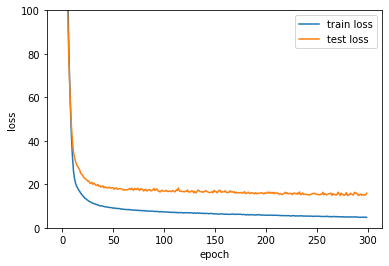

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from keras.regularizers import l2

plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

print("LET =", min(trainRes.history['loss']))
print("LET =", min(trainRes.history['val_loss']))

In [6]:
import numpy as np
from keras.layers import Dropout
np.random.seed(1)
model = Sequential()
model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'rmsprop')
trainRes = model.fit(X_train, y_train,batch_size = 5,epochs = 300, validation_data = (X_test, y_test),verbose = 0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


LET = 11.61312584132798
LET = 21.30178278037592
152/152 [==============================] - 0s 16us/step
TL = 29.7039593144467


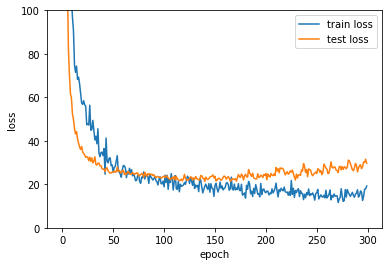

In [7]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
print("LET =", min(trainRes.history['loss']))
print("LET =", min(trainRes.history['val_loss']))
print("TL =", model.evaluate(X_test, y_test))

In [8]:
model = Sequential()
model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'rmsprop')
trainRes = model.fit(X_train, y_train,batch_size = 5,epochs = 300, validation_data = (X_test, y_test),verbose = 0)

LET = 28.350863090005973
LET = 23.12015666459736
152/152 [==============================] - 0s 18us/step
TL = 25.439102975945723


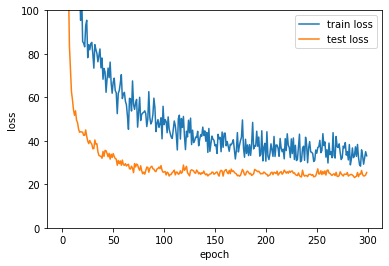

In [9]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

print("LET =", min(trainRes.history['loss']))
print("LET =", min(trainRes.history['val_loss']))
print("TL =", model.evaluate(X_test, y_test))

In [10]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 400, n_features = 10, n_classes = 2)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
model = Sequential()
model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'sgd')
trainRes = model.fit(X_train, y_train,batch_size = 5,epochs = 300, verbose = 0)
print("Test Loss =", model.evaluate(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
120/120 [==============================] - 0s 784us/step
Test Loss = 0.5949108997980753


In [13]:
model = Sequential()
model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'sgd')
trainRes = model.fit(X_train, y_train,batch_size = 5,epochs = 300, verbose = 0)
print("Test Loss =", model.evaluate(X_test, y_test))

120/120 [==============================] - 0s 634us/step
Test Loss = 0.20255095958709718


In [14]:
model = Sequential()
model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'sgd')
trainRes = model.fit(X_train, y_train,batch_size = 5,epochs = 300, verbose = 0)
print("Test Loss =", model.evaluate(X_test, y_test))

120/120 [==============================] - 0s 779us/step
Test Loss = 0.1818412701288859


In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
X, y = make_classification(n_samples = 500, n_features = 16, n_classes = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = 16))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'sgd',loss = 'binary_crossentropy')
trainRes = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 400,batch_size = 5,verbose = 0)
print("Test Loss =", model.evaluate(X_test, y_test))

150/150 [==============================] - 0s 49us/step
Test Loss = 0.5771287290255228


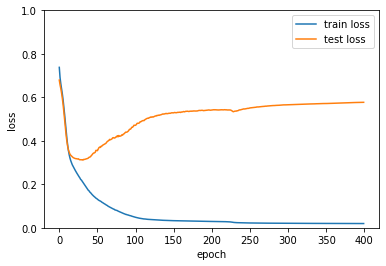

In [17]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

In [18]:
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = 16))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'sgd',loss = 'binary_crossentropy')
es_callback = EarlyStopping(monitor = 'val_loss',mode = 'min')
trainRes = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 400,batch_size = 5,callbacks = [es_callback],verbose = 0)
print("Test Loss =", model.evaluate(X_test, y_test))

150/150 [==============================] - 0s 52us/step
Test Loss = 0.32713897168636324


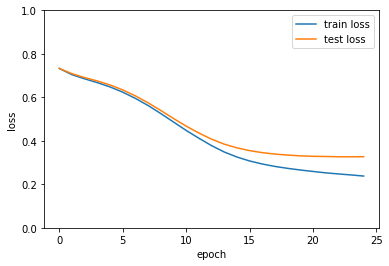

In [19]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')